# CICIDS2017 Starter EDA

In [2]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🔧 Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 📥 Load Data
df = pd.read_csv("../data/cicids2017_combined.csv")

# 👀 Basic Info
print("✅ Dataset loaded. Shape:", df.shape)
df.head()


/var/folders/cz/hz_5566j3_vcr8nvj_0mkh_80000gn/T/ipykernel_5873/4173694628.py:12: DtypeWarning: Columns (80,81,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/cicids2017_combined.csv")


✅ Dataset loaded. Shape: (5491120, 86)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Idle Max,Idle Min,Label,source_file,Flow ID,Source IP,Source Port,Destination IP,Protocol,Timestamp
0,22,166,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN
1,60148,83,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN
2,123,99947,1,1,48.0,48.0,48.0,48.0,48.0,0.0,...,0.0,0.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN
3,123,37017,1,1,48.0,48.0,48.0,48.0,48.0,0.0,...,0.0,0.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN
4,0,111161336,147,0,0.0,0.0,0.0,0.0,0.0,0.0,...,13600000.0,5700287.0,BENIGN,Thursday-WorkingHours-Afternoon-Infilteration....,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values Check

In [3]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)


Flow ID            2830743
 Source IP         2830743
 Source Port       2830743
 Destination IP    2830743
 Protocol          2830743
 Timestamp         2830743
Flow Bytes/s          2696
dtype: int64

## Class Distribution (Attack vs Benign)

/var/folders/cz/hz_5566j3_vcr8nvj_0mkh_80000gn/T/ipykernel_5873/1549664262.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_counts.index, y=grouped_counts.values, palette='mako')


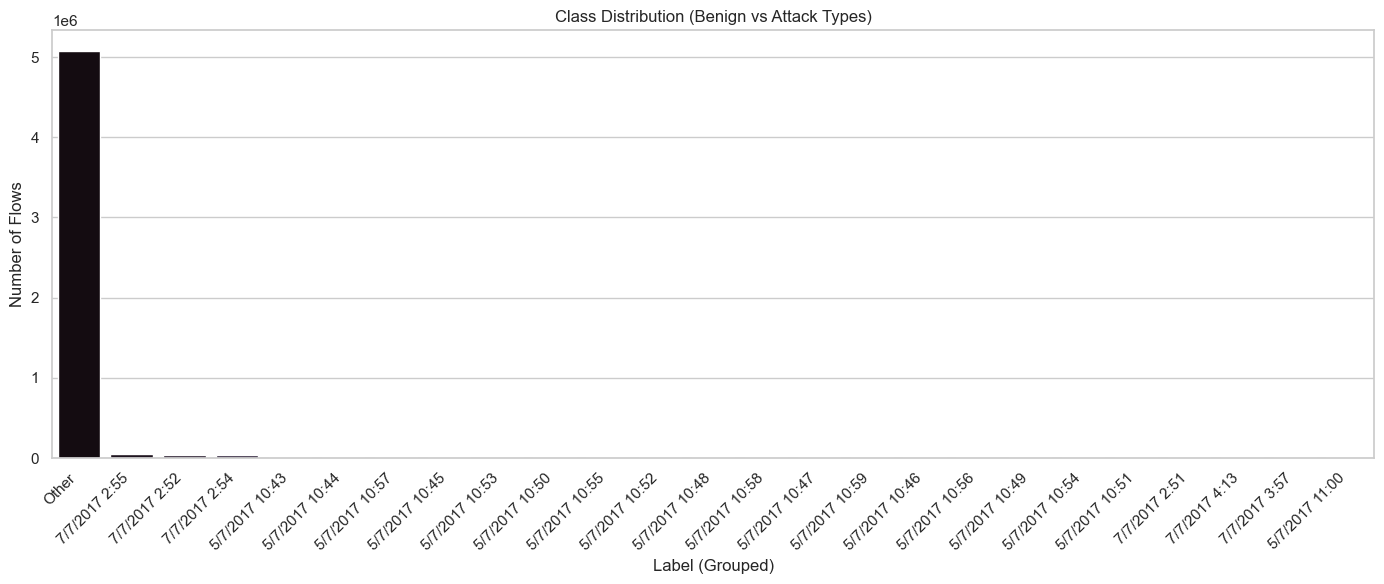

In [10]:
# Step 1: Check if 'Label' column exists
label_col = 'Label' if 'Label' in df.columns else df.columns[-1]

# Step 2: Count all classes
class_counts = df[label_col].value_counts()

# Step 3: Group rare classes into 'Other'
threshold = 10000
df['Label_Grouped'] = df[label_col].apply(
    lambda x: x if pd.notna(x) and class_counts.get(x, 0) >= threshold else 'Other'
)


# Step 4: Re-count for plot
grouped_counts = df['Label_Grouped'].value_counts()

# Step 5: Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=grouped_counts.index, y=grouped_counts.values, palette='mako')
plt.xticks(rotation=45, ha='right')
plt.title("Class Distribution (Benign vs Attack Types)")
plt.xlabel("Label (Grouped)")
plt.ylabel("Number of Flows")
plt.tight_layout()
plt.show()



## Top Correlated Features 

/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


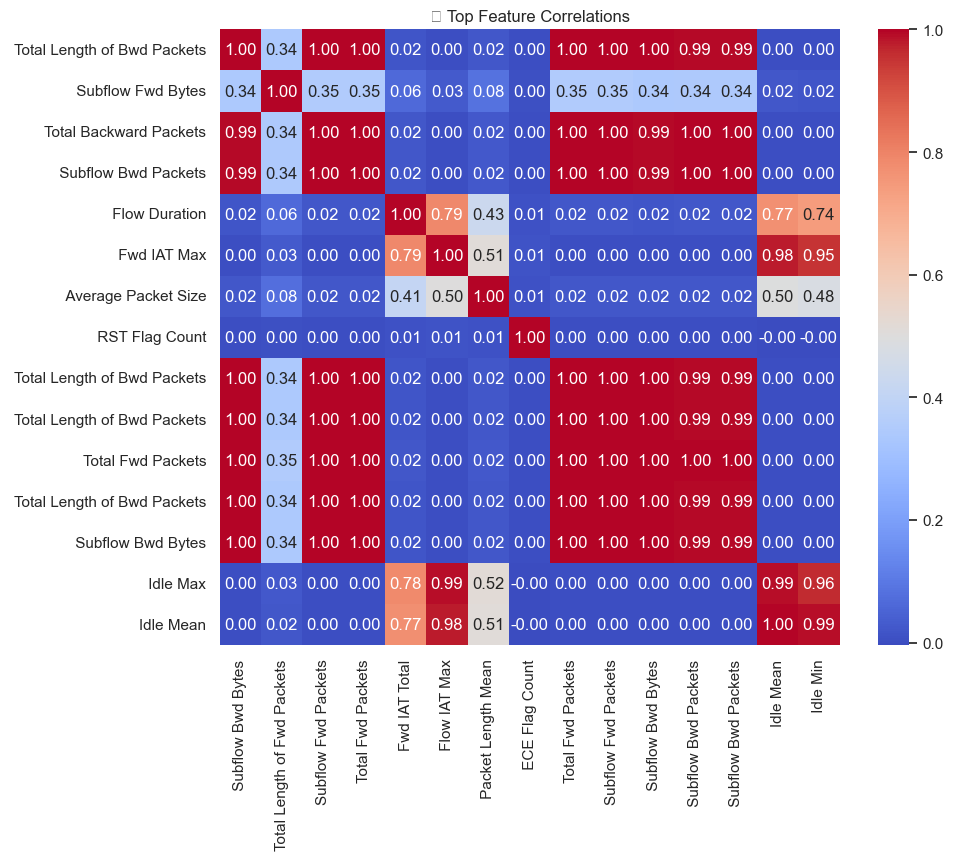

In [5]:
# Convert non-numeric cols
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()

# Heatmap of top 15 correlated features
top_corr_features = corr.abs().unstack().sort_values(kind="quicksort", ascending=False)
top_corr_features = top_corr_features[top_corr_features < 1.0].drop_duplicates().head(15)

top_pairs = [(i, j) for i, j in top_corr_features.index]

plt.figure(figsize=(10, 8))
sns.heatmap(corr.loc[[i for i, j in top_pairs], [j for i, j in top_pairs]], 
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("🔥 Top Feature Correlations")
plt.show()


## Distribution of Flow Duration or Total Bytes

/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


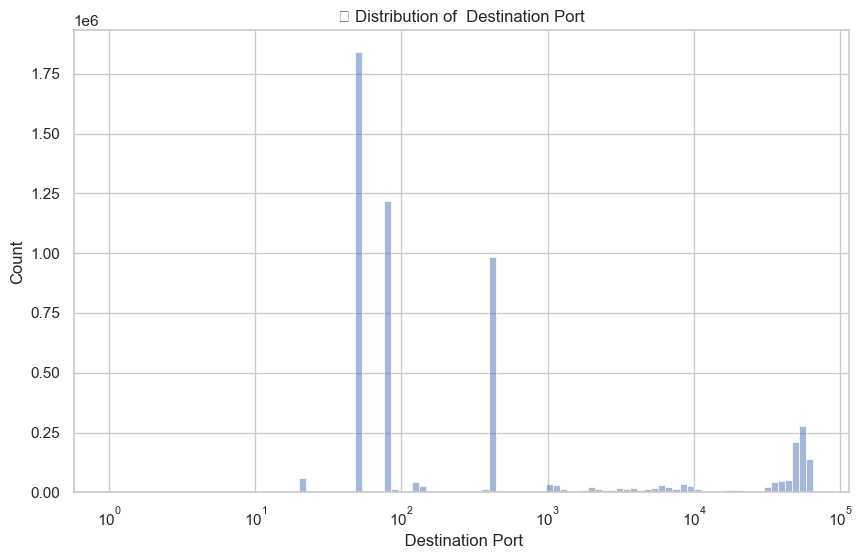

In [6]:
feature = "Flow Duration" if "Flow Duration" in df.columns else df.columns[0]

plt.figure(figsize=(10, 6))
sns.histplot(df[feature], bins=100, kde=True, log_scale=(True, False))
plt.title(f"📈 Distribution of {feature}")
plt.xlabel(feature)
plt.ylabel("Count")
plt.show()


## t-SNE Attack Clustering Visualization

/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


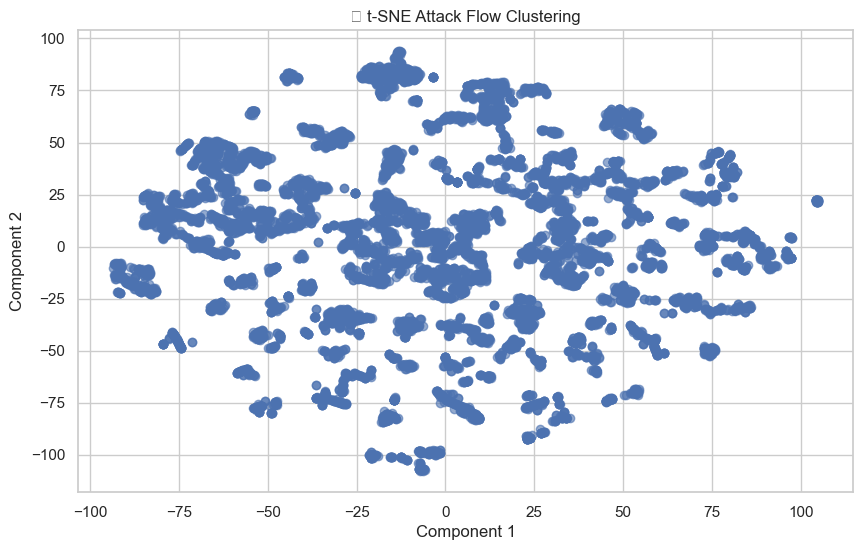

In [8]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Drop infinite and NaN values
df_clean = df_numeric.replace([np.inf, -np.inf], np.nan).dropna()

# Sample and scale
sample_df = df_clean.sample(n=10000, random_state=42)
scaled = StandardScaler().fit_transform(sample_df)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.6)
plt.title("t-SNE Attack Flow Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [11]:
print(df.columns)
print(df.iloc[:, -5:])  # Show last 5 columns
print("Unique values in last column:", df.iloc[:, -1].unique()[:20])


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [12]:
# Print all column names with their index
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")


0:  Destination Port
1:  Flow Duration
2:  Total Fwd Packets
3:  Total Backward Packets
4: Total Length of Fwd Packets
5:  Total Length of Bwd Packets
6:  Fwd Packet Length Max
7:  Fwd Packet Length Min
8:  Fwd Packet Length Mean
9:  Fwd Packet Length Std
10: Bwd Packet Length Max
11:  Bwd Packet Length Min
12:  Bwd Packet Length Mean
13:  Bwd Packet Length Std
14: Flow Bytes/s
15:  Flow Packets/s
16:  Flow IAT Mean
17:  Flow IAT Std
18:  Flow IAT Max
19:  Flow IAT Min
20: Fwd IAT Total
21:  Fwd IAT Mean
22:  Fwd IAT Std
23:  Fwd IAT Max
24:  Fwd IAT Min
25: Bwd IAT Total
26:  Bwd IAT Mean
27:  Bwd IAT Std
28:  Bwd IAT Max
29:  Bwd IAT Min
30: Fwd PSH Flags
31:  Bwd PSH Flags
32:  Fwd URG Flags
33:  Bwd URG Flags
34:  Fwd Header Length
35:  Bwd Header Length
36: Fwd Packets/s
37:  Bwd Packets/s
38:  Min Packet Length
39:  Max Packet Length
40:  Packet Length Mean
41:  Packet Length Std
42:  Packet Length Variance
43: FIN Flag Count
44:  SYN Flag Count
45:  RST Flag Count
46:  PSH Flag 

In [13]:
sample_file = "/Users/rajkumarmyakala/Downloads/data_cic/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"

df_raw = pd.read_csv(sample_file, header=None)
print("Shape:", df_raw.shape)
print("Last few rows:")
print(df_raw.tail(3))


Shape: (225746, 79)
Last few rows:
           0   1  2  3   4  5  6  7    8    9   ...  69   70   71 72 73   74  \
225743  61375  75  1  1   6  6  6  6  6.0  0.0  ...  20  0.0  0.0  0  0  0.0   
225744  61323  48  2  0  12  0  6  6  6.0  0.0  ...  20  0.0  0.0  0  0  0.0   
225745  61326  68  1  1   6  6  6  6  6.0  0.0  ...  20  0.0  0.0  0  0  0.0   

         75 76 77      78  
225743  0.0  0  0  BENIGN  
225744  0.0  0  0  BENIGN  
225745  0.0  0  0  BENIGN  

[3 rows x 79 columns]


/var/folders/cz/hz_5566j3_vcr8nvj_0mkh_80000gn/T/ipykernel_5873/3361658234.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(sample_file, header=None)
